## 데이터 불러오기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_x = pd.read_csv('data/train/train.csv')
train_y = pd.read_csv('data/train/train_label.csv')
test_x = pd.read_csv('data/test/test.csv')
test_y = pd.read_csv('data/test/test_label.csv')

In [3]:
# EDA 및 전처리 과정 용이하게 하기 위해 합침
train = pd.merge(train_x, train_y)

In [4]:
train.shape

(13228, 20)

In [5]:
# EDA 및 전처리 과정 용이하게 하기 위해 합침
test = pd.merge(test_x, test_y)

In [6]:
test.shape

(13229, 20)

In [7]:
train.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,Y,Y,0,202500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-19031,365243,1,0,0,0,NaN,2,-53,1
1,1,F,N,N,1,157500.0,Working,Higher education,Married,House / apartment,-15773,-309,1,0,1,0,Sales staff,3,-26,0
2,2,M,Y,N,0,135000.0,Working,Secondary / secondary special,Married,House / apartment,-13483,-1816,1,1,1,0,Laborers,2,-9,1
3,3,F,Y,N,2,112500.0,Working,Secondary / secondary special,Married,House / apartment,-12270,-150,1,0,1,0,Security staff,4,-12,1
4,4,M,Y,Y,1,225000.0,Working,Secondary / secondary special,Married,House / apartment,-16175,-2371,1,0,0,0,Drivers,3,-3,1


## 데이터 type 확인

In [8]:
# train data의 dtype 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13228 entries, 0 to 13227
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          13228 non-null  int64  
 1   gender         13228 non-null  object 
 2   car            13228 non-null  object 
 3   reality        13228 non-null  object 
 4   child_num      13228 non-null  int64  
 5   income_total   13228 non-null  float64
 6   income_type    13228 non-null  object 
 7   edu_type       13228 non-null  object 
 8   family_type    13228 non-null  object 
 9   house_type     13228 non-null  object 
 10  DAYS_BIRTH     13228 non-null  int64  
 11  DAYS_EMPLOYED  13228 non-null  int64  
 12  FLAG_MOBIL     13228 non-null  int64  
 13  work_phone     13228 non-null  int64  
 14  phone          13228 non-null  int64  
 15  email          13228 non-null  int64  
 16  occyp_type     9096 non-null   object 
 17  family_size    13228 non-null  int64  
 18  begin_

## null값 확인

In [9]:
# train data의 null값 존재 여부 확인 -> 'occyp_type' null값 존재 -> 전처리 불가피
train.isnull().sum()

index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       4132
family_size         0
begin_month         0
credit              0
dtype: int64

## 데이터 분포 확인

In [10]:
# train data의 수치형 column에 대한 분포 확인
train.describe()

,index,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
count,13228.000000,13228.000000,1.322800e+04,13228.000000,13228.000000,13228.0,13228.000000,13228.000000,13228.000000,13228.000000,13228.000000,13228.000000
mean,6613.500000,0.428107,1.888212e+05,-15958.143408,59854.037496,1.0,0.230269,0.296946,0.089507,2.192773,-26.198292,0.878213
std,3818.739015,0.740691,1.041743e+05,4199.720373,138166.424477,0.0,0.421021,0.456930,0.285485,0.910463,16.579604,0.327052
min,0.000000,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000,0.000000
25%,3306.750000,0.000000,1.215000e+05,-19406.500000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,-40.000000,1.000000
50%,6613.500000,0.000000,1.575000e+05,-15521.500000,-1539.000000,1.0,0.000000,0.000000,0.000000,2.000000,-24.000000,1.000000
75%,9920.250000,1.000000,2.250000e+05,-12454.000000,-401.750000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000,1.000000
max,13227.000000,14.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,15.000000,0.000000,1.000000


## train & test EDA

### y value : [credit] EDA -  사용자의 신용카드 대금 연체를 기준으로 한 신용도 (0: 낮은 신용도, 1: 높은 신용도)
+ class imbalance 상태 -> 전처리 필요!!

#### train

In [11]:
# 0과 1의 label 값의 비율 확인 -> 1:7 의 class imbalance 상태 -> 추후 전처리 과정 불가피
train['credit'].value_counts()

1    11617
0     1611
Name: credit, dtype: int64

<AxesSubplot:ylabel='credit'>

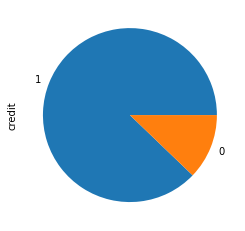

In [12]:
# 데이터 분포도
train['credit'].value_counts().plot.pie()

#### test : null 값

### [gender] EDA -  성별
+ train과 test 데이터의 countplot 분포가 비슷
+ train과 test 모두 Female의 비율이 높음

#### train

In [13]:
train['gender'].value_counts()

F    8795
M    4433
Name: gender, dtype: int64

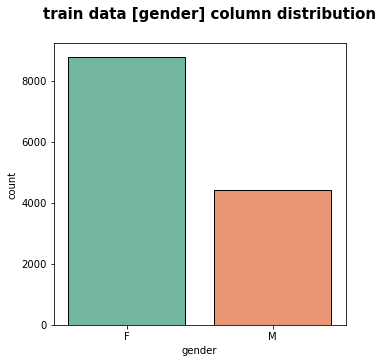

In [14]:
# countplot 시각화

fig, axes = plt.subplots(1, 1, figsize=(5, 5), sharey=True)

sns.countplot(x='gender', data=train, palette="Set2", edgecolor='black')  
plt.suptitle('train data [gender] column distribution', fontsize=15, fontweight='bold', x=0.13, y=1.0, ha='left') 

plt.tight_layout()
plt.show()

#### test

In [15]:
test['gender'].value_counts()

F    8902
M    4327
Name: gender, dtype: int64

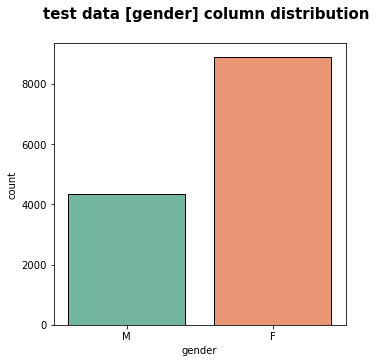

In [16]:
# countplot 시각화

fig, axes = plt.subplots(1, 1, figsize=(5, 5), sharey=True)

sns.countplot(x='gender', data=test, palette="Set2", edgecolor='black')  
plt.suptitle('test data [gender] column distribution', fontsize=15, fontweight='bold', x=0.13, y=1.0, ha='left') 

plt.tight_layout()
plt.show()

### [car] EDA -  차량 소유 여부
+ train과 test 데이터의 countplot 분포가 비슷
+ train과 test 모두 N의 비율이 높음

#### train

In [17]:
train['car'].value_counts()

N    8251
Y    4977
Name: car, dtype: int64

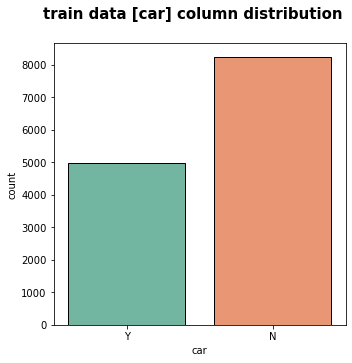

In [18]:
# countplot 시각화

fig, axes = plt.subplots(1, 1, figsize=(5, 5), sharey=True)

sns.countplot(x='car', data=train, palette="Set2", edgecolor='black')  
plt.suptitle('train data [car] column distribution', fontsize=15, fontweight='bold', x=0.13, y=1.0, ha='left') 

plt.tight_layout()
plt.show()

#### test

In [19]:
test['car'].value_counts()

N    8159
Y    5070
Name: car, dtype: int64

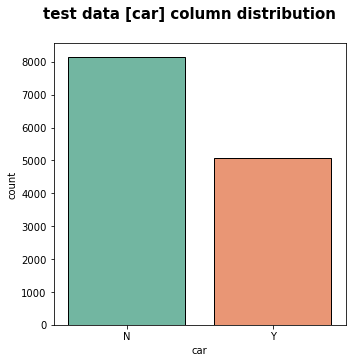

In [20]:
# countplot 시각화

fig, axes = plt.subplots(1, 1, figsize=(5, 5), sharey=True)

sns.countplot(x='car', data=test, palette="Set2", edgecolor='black')  
plt.suptitle('test data [car] column distribution', fontsize=15, fontweight='bold', x=0.13, y=1.0, ha='left') 

plt.tight_layout()
plt.show()

### [reality] EDA -  부동산 소유 여부
+ train과 test 데이터의 countplot 분포가 비슷
+ 모두 Y의 비율이 더 높음

#### train

In [21]:
train['reality'].value_counts()

Y    8823
N    4405
Name: reality, dtype: int64

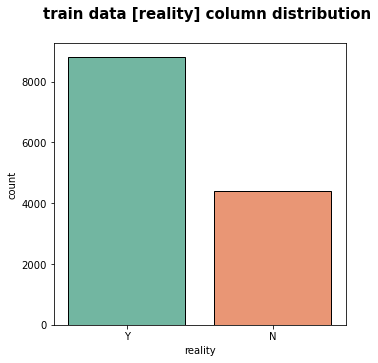

In [22]:
# countplot 시각화

fig, axes = plt.subplots(1, 1, figsize=(5, 5), sharey=True)

sns.countplot(x='reality', data=train, palette="Set2", edgecolor='black')  
plt.suptitle('train data [reality] column distribution', fontsize=15, fontweight='bold', x=0.13, y=1.0, ha='left') 

plt.tight_layout()
plt.show()

#### test

In [23]:
test['reality'].value_counts()

Y    9007
N    4222
Name: reality, dtype: int64

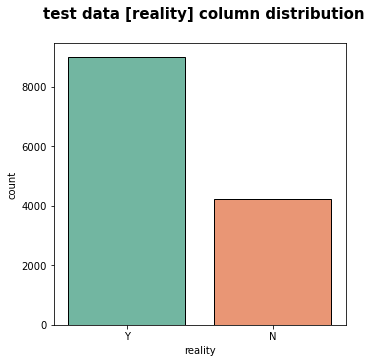

In [24]:
# countplot 시각화

fig, axes = plt.subplots(1, 1, figsize=(5, 5), sharey=True)

sns.countplot(x='reality', data=test, palette="Set2", edgecolor='black')  
plt.suptitle('test data [reality] column distribution', fontsize=15, fontweight='bold', x=0.13, y=1.0, ha='left') 

plt.tight_layout()
plt.show()

### [child_num] EDA -  자녀 수
+ train과 test 데이터의 countplot 분포가 비슷
+ child가 적은 비율이 높음

#### train

In [25]:
train['child_num'].value_counts()

0     9144
1     2751
2     1150
3      148
4       27
5        5
14       2
7        1
Name: child_num, dtype: int64

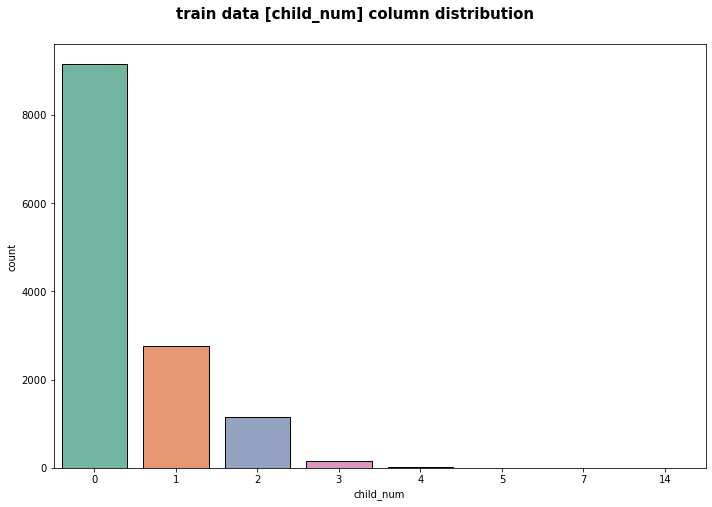

In [26]:
# countplot 시각화

fig, axes = plt.subplots(1,1, figsize=(10, 7), sharey=True)

sns.countplot(x='child_num', data=train, palette="Set2", edgecolor='black')  
plt.suptitle('train data [child_num] column distribution', fontsize=15, fontweight='bold', x=0.25, y=1.0, ha='left') 

plt.tight_layout()
plt.show()

#### test

In [27]:
test['child_num'].value_counts()

0     9196
1     2635
2     1212
3      158
4       20
5        5
7        1
19       1
14       1
Name: child_num, dtype: int64

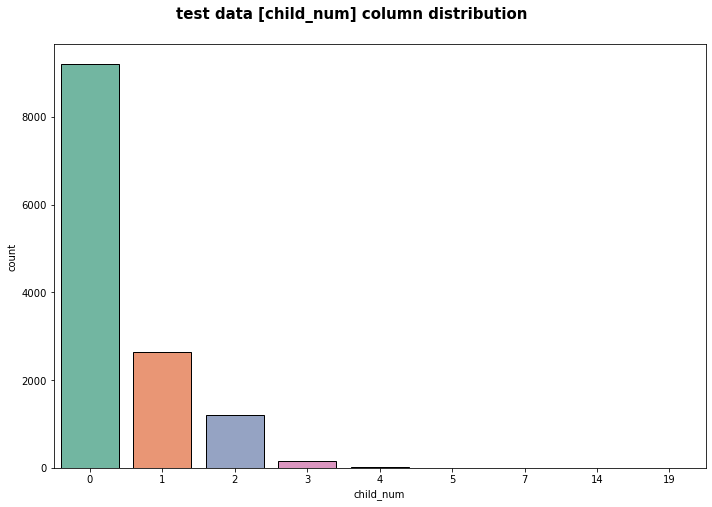

In [28]:
# countplot 시각화

fig, axes = plt.subplots(1,1, figsize=(10, 7), sharey=True)

sns.countplot(x='child_num', data=test, palette="Set2", edgecolor='black')  
plt.suptitle('test data [child_num] column distribution', fontsize=15, fontweight='bold', x=0.25, y=1.0, ha='left') 

plt.tight_layout()
plt.show()

### [income_total] EDA -  연간 소득
+ train과 test 데이터의 boxplot 분포가 비슷

#### train

In [29]:
train['income_total'].value_counts()

135000.0    1578
157500.0    1123
225000.0    1114
112500.0    1100
180000.0    1058
            ... 
215100.0       1
240750.0       1
46948.5        1
177750.0       1
661500.0       1
Name: income_total, Length: 216, dtype: int64

<AxesSubplot:>

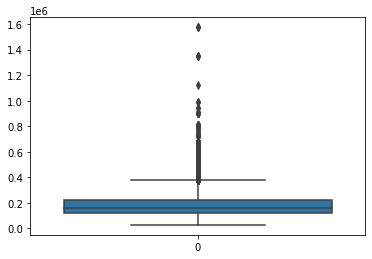

In [30]:
# boxplot 시각화
sns.boxplot(train['income_total'])

#### test

In [31]:
test['income_total'].value_counts()

135000.0    1586
180000.0    1167
157500.0    1110
112500.0    1078
225000.0    1056
            ... 
69372.0        1
101250.0       1
227250.0       1
60376.5        1
91530.0        1
Name: income_total, Length: 218, dtype: int64

<AxesSubplot:>

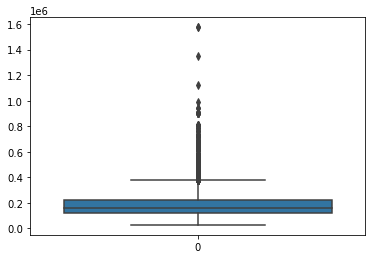

In [32]:
# boxplot 시각화
sns.boxplot(test['income_total'])

### [income_type] EDA -  소득 분류
+ train과 test 데이터의 countplot 분포가 비슷
+ train과 test 모두 working의 비율이 높음

#### train

In [33]:
train['income_type'].value_counts()

Working                 6766
Commercial associate    3108
Pensioner               2249
State servant           1103
Student                    2
Name: income_type, dtype: int64

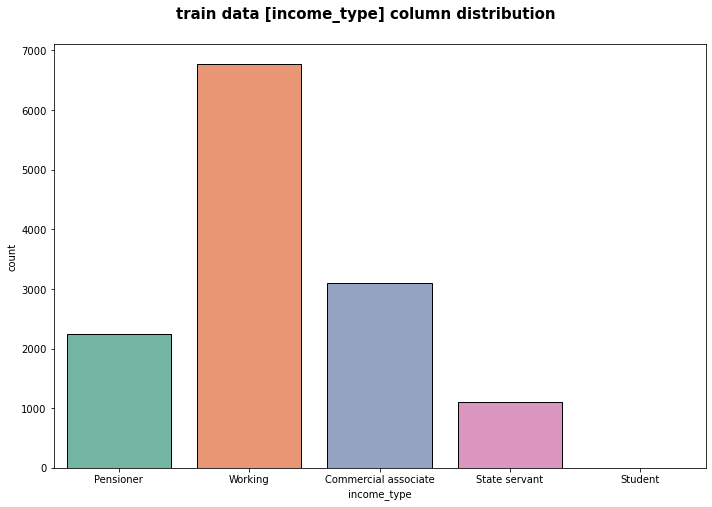

In [34]:
# countplot 시각화

fig, axes = plt.subplots(1,1, figsize=(10, 7), sharey=True)

sns.countplot(x='income_type', data=train, palette="Set2", edgecolor='black')  
plt.suptitle('train data [income_type] column distribution', fontsize=15, fontweight='bold', x=0.25, y=1.0, ha='left') 

plt.tight_layout()
plt.show()

#### test

In [35]:
test['income_type'].value_counts()

Working                 6879
Commercial associate    3094
Pensioner               2200
State servant           1051
Student                    5
Name: income_type, dtype: int64

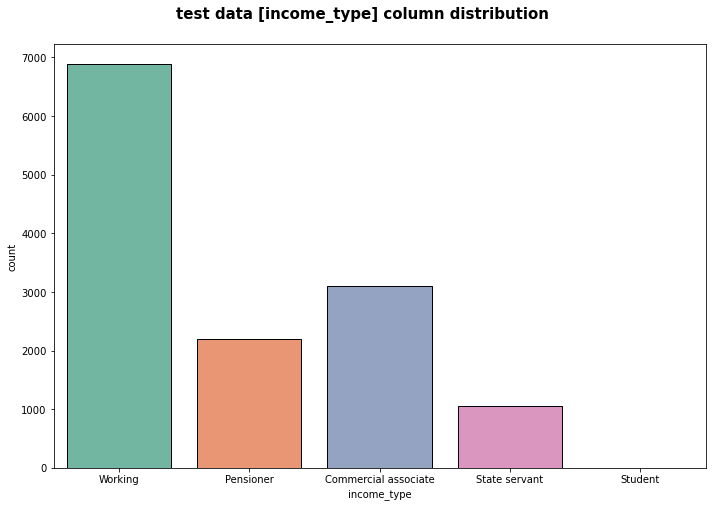

In [36]:
# countplot 시각화

fig, axes = plt.subplots(1,1, figsize=(10, 7), sharey=True)

sns.countplot(x='income_type', data=test, palette="Set2", edgecolor='black')  
plt.suptitle('test data [income_type] column distribution', fontsize=15, fontweight='bold', x=0.25, y=1.0, ha='left') 

plt.tight_layout()
plt.show()

### [edu_type] EDA -  교육 수준
+ train과 test 데이터의 countplot 분포가 비슷
+ Secondary / secondary special의 비율이 가장 높음

In [37]:
train['edu_type'].value_counts()

Secondary / secondary special    8972
Higher education                 3626
Incomplete higher                 499
Lower secondary                   118
Academic degree                    13
Name: edu_type, dtype: int64

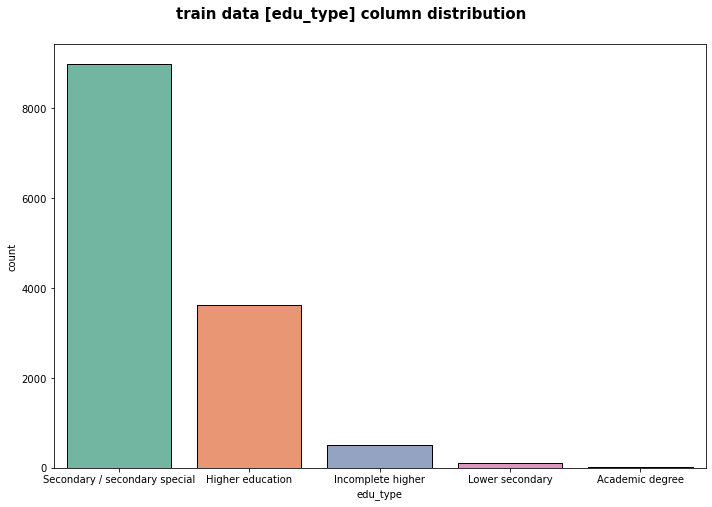

In [38]:
# countplot 시각화

fig, axes = plt.subplots(1,1, figsize=(10, 7), sharey=True)

sns.countplot(x='edu_type', data=train, palette="Set2", edgecolor='black')  
plt.suptitle('train data [edu_type] column distribution', fontsize=15, fontweight='bold', x=0.25, y=1.0, ha='left') 

plt.tight_layout()
plt.show()

#### test

In [39]:
test['edu_type'].value_counts()

Secondary / secondary special    9023
Higher education                 3536
Incomplete higher                 521
Lower secondary                   139
Academic degree                    10
Name: edu_type, dtype: int64

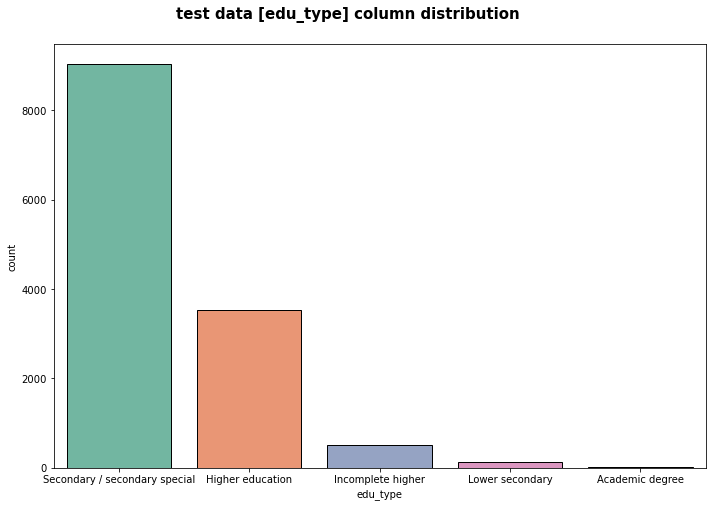

In [40]:
# countplot 시각화

fig, axes = plt.subplots(1,1, figsize=(10, 7), sharey=True)

sns.countplot(x='edu_type', data=test, palette="Set2", edgecolor='black')  
plt.suptitle('test data [edu_type] column distribution', fontsize=15, fontweight='bold', x=0.25, y=1.0, ha='left') 

plt.tight_layout()
plt.show()

### [family_type] EDA -  결혼 여부
+ train과 test 데이터의 countplot 분포가 비슷
+ Married의 비율이 가장 높음

#### train

In [41]:
train['family_type'].value_counts()

Married                 9068
Single / not married    1770
Civil marriage          1041
Separated                771
Widow                    578
Name: family_type, dtype: int64

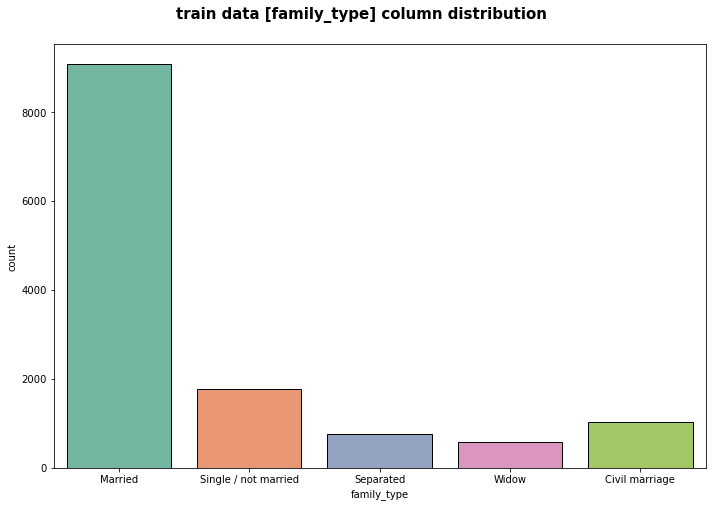

In [42]:
# countplot 시각화

fig, axes = plt.subplots(1,1, figsize=(10, 7), sharey=True)

sns.countplot(x='family_type', data=train, palette="Set2", edgecolor='black')  
plt.suptitle('train data [family_type] column distribution', fontsize=15, fontweight='bold', x=0.25, y=1.0, ha='left') 

plt.tight_layout()
plt.show()

<AxesSubplot:ylabel='family_type'>

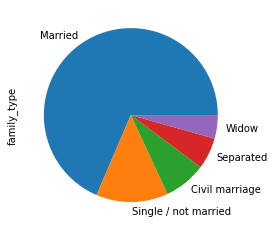

In [43]:
# 데이터 분포도
train['family_type'].value_counts().plot.pie()

#### test

In [44]:
test['family_type'].value_counts()

Married                 9128
Single / not married    1726
Civil marriage          1082
Separated                768
Widow                    525
Name: family_type, dtype: int64

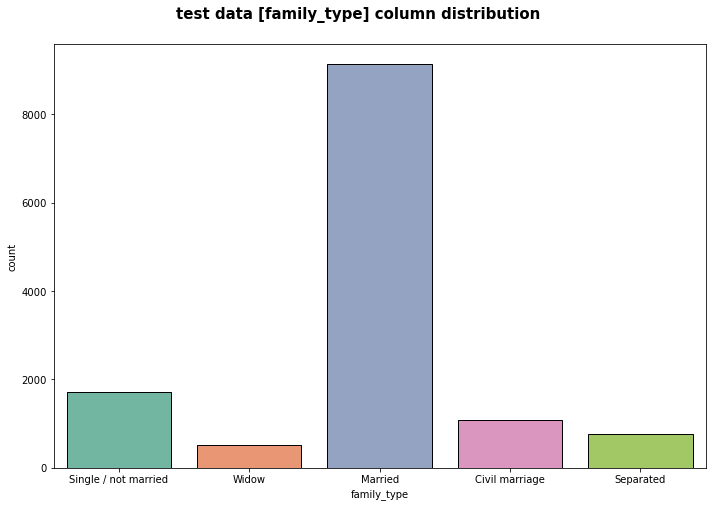

In [45]:
# countplot 시각화

fig, axes = plt.subplots(1,1, figsize=(10, 7), sharey=True)

sns.countplot(x='family_type', data=test, palette="Set2", edgecolor='black')  
plt.suptitle('test data [family_type] column distribution', fontsize=15, fontweight='bold', x=0.25, y=1.0, ha='left') 

plt.tight_layout()
plt.show()

<AxesSubplot:ylabel='family_type'>

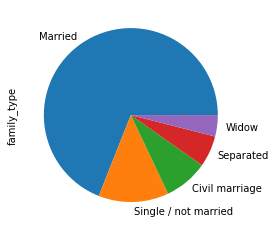

In [46]:
# 데이터 분포도
test['family_type'].value_counts().plot.pie()

### [house_type] EDA -  생활 방식
+ train과 test 데이터의 countplot 분포가 비슷
+ train과 test 모두 House / apartment의 비율이 가장 높음

#### train

In [47]:
train['house_type'].value_counts()

House / apartment      11820
With parents             628
Municipal apartment      413
Rented apartment         215
Office apartment          93
Co-op apartment           59
Name: house_type, dtype: int64

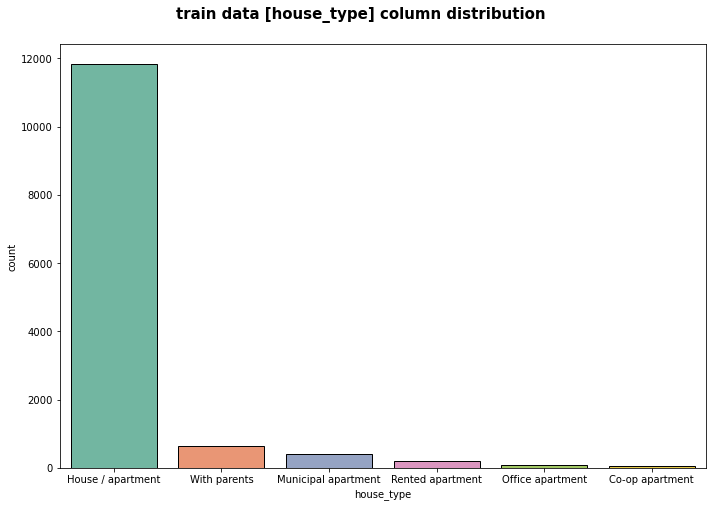

In [48]:
# countplot 시각화

fig, axes = plt.subplots(1,1, figsize=(10, 7), sharey=True)

sns.countplot(x='house_type', data=train, palette="Set2", edgecolor='black')  
plt.suptitle('train data [house_type] column distribution', fontsize=15, fontweight='bold', x=0.25, y=1.0, ha='left') 

plt.tight_layout()
plt.show()

<AxesSubplot:ylabel='house_type'>

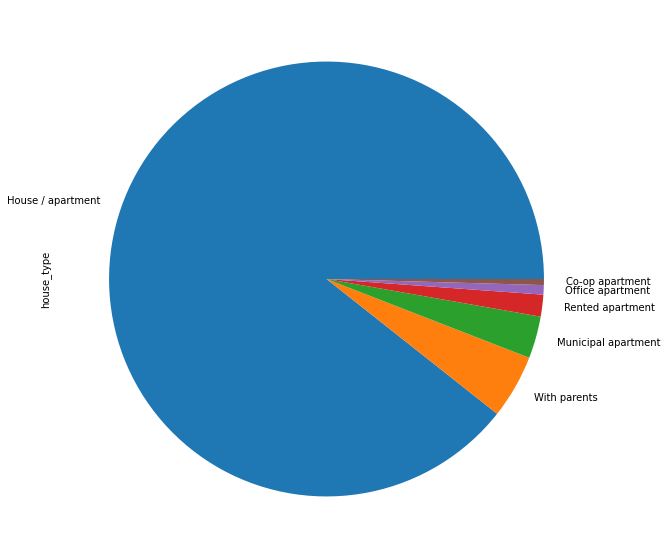

In [49]:
# 데이터 분포도
fig, axes = plt.subplots(1, 1, figsize=(10,10), sharey=True)
train['house_type'].value_counts().plot.pie()

#### test

In [50]:
test['house_type'].value_counts()

House / apartment      11833
With parents             629
Municipal apartment      405
Rented apartment         214
Office apartment          97
Co-op apartment           51
Name: house_type, dtype: int64

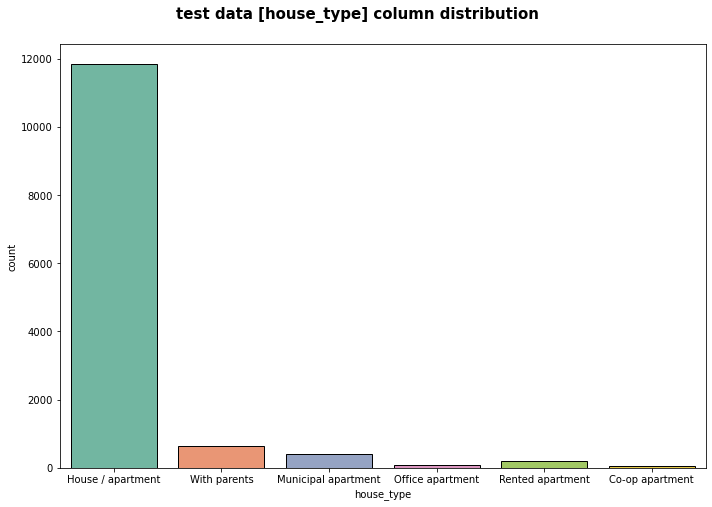

In [51]:
# countplot 시각화

fig, axes = plt.subplots(1,1, figsize=(10, 7), sharey=True)

sns.countplot(x='house_type', data=test, palette="Set2", edgecolor='black')  
plt.suptitle('test data [house_type] column distribution', fontsize=15, fontweight='bold', x=0.25, y=1.0, ha='left') 

plt.tight_layout()
plt.show()

<AxesSubplot:ylabel='house_type'>

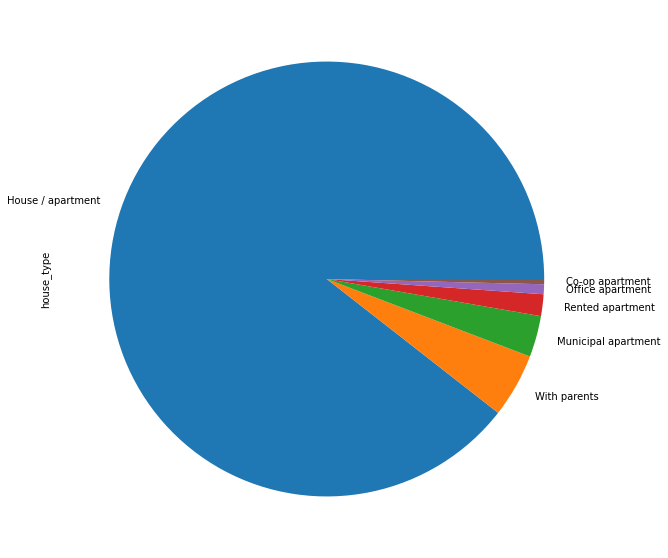

In [52]:
# 데이터 분포도
fig, axes = plt.subplots(1, 1, figsize=(10,10), sharey=True)
test['house_type'].value_counts().plot.pie()

### [DAYS_BIRTH] EDA -  출생일, 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전에 태어났음을 의미
+ train과 test 데이터의 boxplot 분포가 비슷
+ 모두 outlier로 판단되는 데이터 없음

#### train

<AxesSubplot:>

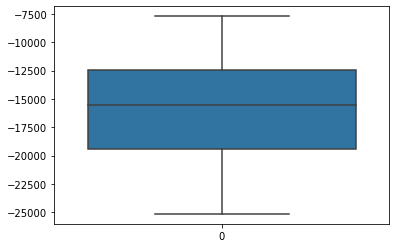

In [53]:
# boxplot 시각화
sns.boxplot(train['DAYS_BIRTH'])

#### test

<AxesSubplot:>

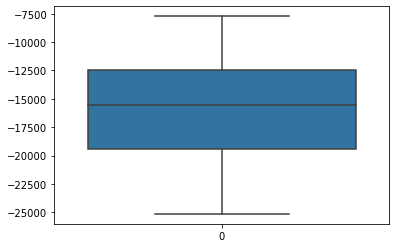

In [54]:
# boxplot 시각화
sns.boxplot(test['DAYS_BIRTH'])

### [DAYS_EMPLOYED] EDA -  업무 시작일, 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전부터 일을 시작함을 의미 양수 값은 고용되지 않은 상태를 의미함
+ train과 test 데이터의 boxplot 분포가 비슷
+ 양수 값 : 크기에 상관없이 고용되지 않은 상태를 의미 -> 양수 값에 대한 전처리 과정 불가피

#### train

In [55]:
train['DAYS_EMPLOYED']

0        365243
1          -309
2         -1816
3          -150
4         -2371
          ...  
13223     -5637
13224     -3482
13225     -7827
13226     -2326
13227     -1621
Name: DAYS_EMPLOYED, Length: 13228, dtype: int64

In [56]:
train[train['DAYS_EMPLOYED']>0]

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,Y,Y,0,202500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-19031,365243,1,0,0,0,NaN,2,-53,1
6,6,F,N,N,0,157500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21253,365243,1,0,1,0,NaN,2,-10,1
7,7,M,Y,Y,1,270000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-18948,365243,1,0,0,0,NaN,3,-52,1
12,12,F,N,Y,0,112500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-22361,365243,1,0,0,0,NaN,2,-30,1
14,14,F,Y,N,0,225000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-20460,365243,1,0,0,0,NaN,2,-20,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13191,13191,F,N,Y,0,121500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-23784,365243,1,0,0,0,NaN,2,-13,1
13193,13193,F,N,Y,0,135000.0,Pensioner,Higher education,Married,House / apartment,-21226,365243,1,0,0,0,NaN,2,-13,1
13195,13195,F,N,Y,0,112500.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-23632,365243,1,0,0,0,NaN,1,-18,1
13207,13207,F,N,Y,0,360000.0,Pensioner,Higher education,Married,House / apartment,-22295,365243,1,0,0,0,NaN,2,-17,1


<AxesSubplot:>

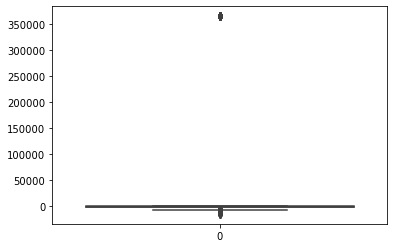

In [57]:
# boxplot 시각화
sns.boxplot(train['DAYS_EMPLOYED'])

#### test

In [58]:
test['DAYS_EMPLOYED']

0         -1101
1        365243
2         -1389
3         -4019
4         -2879
          ...  
13224     -2057
13225     -2049
13226     -5420
13227     -4781
13228      -962
Name: DAYS_EMPLOYED, Length: 13229, dtype: int64

In [59]:
test[test['DAYS_EMPLOYED']>0]

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
1,1,F,N,Y,0,157500.0,Pensioner,Secondary / secondary special,Widow,House / apartment,-24340,365243,1,0,1,0,NaN,1,-52,NaN
6,6,F,N,Y,0,45000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21740,365243,1,0,0,0,NaN,2,-6,NaN
8,8,F,N,N,0,135000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-23056,365243,1,0,1,0,NaN,2,-11,NaN
19,19,F,N,Y,0,90000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-22123,365243,1,0,0,1,NaN,2,-31,NaN
24,24,F,N,Y,0,90000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-20718,365243,1,0,0,0,NaN,2,-5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13201,13201,F,N,Y,0,157500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-23129,365243,1,0,0,0,NaN,2,-60,NaN
13205,13205,F,N,Y,0,67500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-20575,365243,1,0,1,0,NaN,2,-28,NaN
13207,13207,F,N,Y,0,225000.0,Pensioner,Higher education,Married,House / apartment,-23868,365243,1,0,0,0,NaN,2,-20,NaN
13211,13211,M,N,Y,0,46948.5,Pensioner,Secondary / secondary special,Single / not married,House / apartment,-21167,365243,1,0,0,0,NaN,1,-5,NaN


<AxesSubplot:>

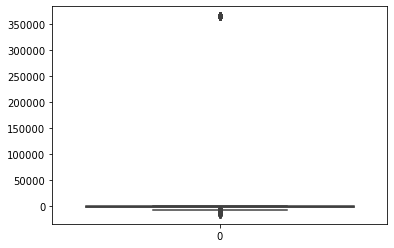

In [60]:
# boxplot 시각화
sns.boxplot(test['DAYS_EMPLOYED'])

### [FLAG_MOBIL] EDA - 핸드폰 소유 여부
+ train과 test 데이터의 countplot 분포가 비슷
+ 모두 1이라는 단일 값만을 가짐 -> 분류 모델에 영향이 없을 것이라는 판단 -> 변수 축소 전처리 불가피

#### train

In [61]:
train['FLAG_MOBIL'].value_counts()

1    13228
Name: FLAG_MOBIL, dtype: int64

<AxesSubplot:ylabel='FLAG_MOBIL'>

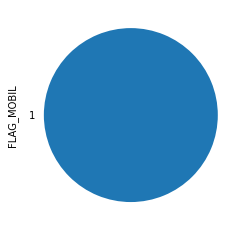

In [62]:
# 데이터 분포도
train['FLAG_MOBIL'].value_counts().plot.pie()

#### test

In [63]:
test['FLAG_MOBIL'].value_counts()

1    13229
Name: FLAG_MOBIL, dtype: int64

<AxesSubplot:ylabel='FLAG_MOBIL'>

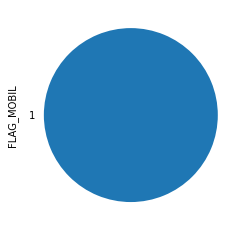

In [64]:
# 데이터 분포도
test['FLAG_MOBIL'].value_counts().plot.pie()

### [work_phone] EDA -  업무용 전화 소유 여부
+ train과 test 데이터의 countplot 분포가 비슷
+ train과 test 모두 0의 비율이 높음

#### train

In [65]:
train['work_phone'].value_counts()

0    10182
1     3046
Name: work_phone, dtype: int64

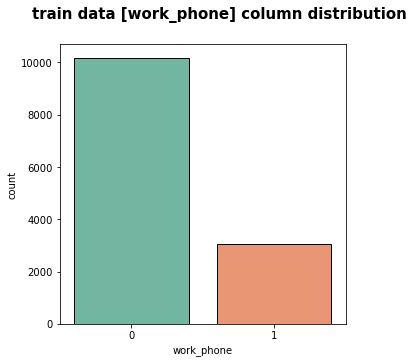

In [66]:
# countplot 시각화

fig, axes = plt.subplots(1, 1, figsize=(5, 5), sharey=True)

sns.countplot(x='work_phone', data=train, palette="Set2", edgecolor='black')  
plt.suptitle('train data [work_phone] column distribution', fontsize=15, fontweight='bold', x=0.1, y=1.0, ha='left') 

plt.tight_layout()
plt.show()

<AxesSubplot:ylabel='work_phone'>

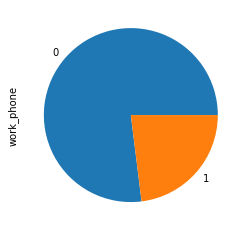

In [67]:
# 데이터 분포도
train['work_phone'].value_counts().plot.pie()

#### test

In [68]:
test['work_phone'].value_counts()

0    10329
1     2900
Name: work_phone, dtype: int64

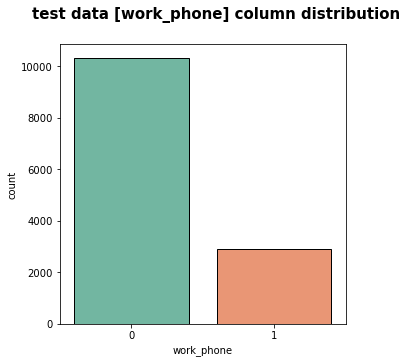

In [69]:
# countplot 시각화

fig, axes = plt.subplots(1, 1, figsize=(5, 5), sharey=True)

sns.countplot(x='work_phone', data=test, palette="Set2", edgecolor='black')  
plt.suptitle('test data [work_phone] column distribution', fontsize=15, fontweight='bold', x=0.1, y=1.0, ha='left') 

plt.tight_layout()
plt.show()

<AxesSubplot:ylabel='work_phone'>

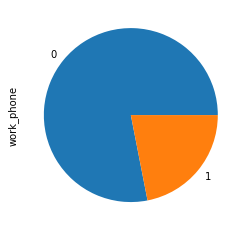

In [70]:
# 데이터 분포도
test['work_phone'].value_counts().plot.pie()

### [phone] EDA -  전화 소유 여부
+ train과 test 데이터의 countplot 분포가 비슷
+ train과 test 모두 0의 비율이 높음

#### train

In [71]:
train['phone'].value_counts()

0    9300
1    3928
Name: phone, dtype: int64

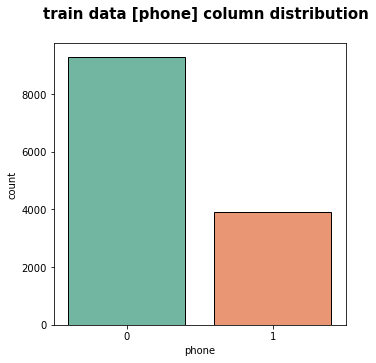

In [72]:
# countplot 시각화

fig, axes = plt.subplots(1, 1, figsize=(5, 5), sharey=True)

sns.countplot(x='phone', data=train, palette="Set2", edgecolor='black')  
plt.suptitle('train data [phone] column distribution', fontsize=15, fontweight='bold', x=0.13, y=1.0, ha='left') 

plt.tight_layout()
plt.show()

<AxesSubplot:ylabel='phone'>

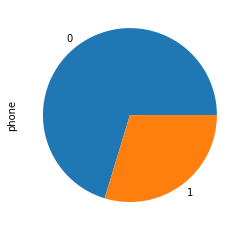

In [73]:
# 데이터 분포도
train['phone'].value_counts().plot.pie()

#### test

In [74]:
test['phone'].value_counts()

0    9372
1    3857
Name: phone, dtype: int64

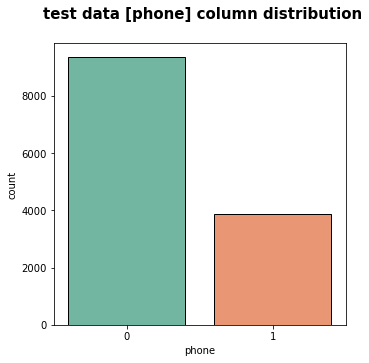

In [75]:
# countplot 시각화

fig, axes = plt.subplots(1, 1, figsize=(5, 5), sharey=True)

sns.countplot(x='phone', data=test, palette="Set2", edgecolor='black')  
plt.suptitle('test data [phone] column distribution', fontsize=15, fontweight='bold', x=0.13, y=1.0, ha='left') 

plt.tight_layout()
plt.show()

<AxesSubplot:ylabel='phone'>

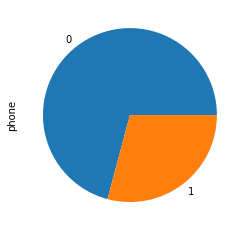

In [76]:
# 데이터 분포도
test['phone'].value_counts().plot.pie()

### [email] EDA - 이메일 소유 여부
+ train과 test 데이터의 countplot 분포가 비슷
+ train과 test 모두 0의 비율이 높음

#### train

In [77]:
train['email'].value_counts()

0    12044
1     1184
Name: email, dtype: int64

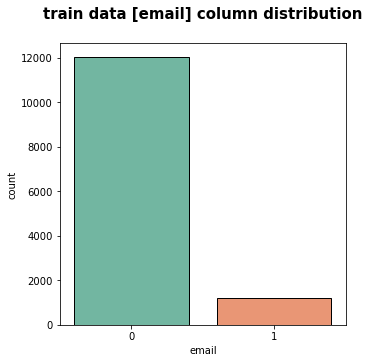

In [78]:
# countplot 시각화

fig, axes = plt.subplots(1, 1, figsize=(5, 5), sharey=True)

sns.countplot(x='email', data=train, palette="Set2", edgecolor='black')  
plt.suptitle('train data [email] column distribution', fontsize=15, fontweight='bold', x=0.13, y=1.0, ha='left') 

plt.tight_layout()
plt.show()

<AxesSubplot:ylabel='email'>

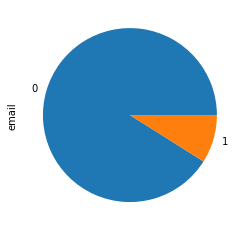

In [79]:
# 데이터 분포도
train['email'].value_counts().plot.pie()

#### test

In [80]:
test['email'].value_counts()

0    11998
1     1231
Name: email, dtype: int64

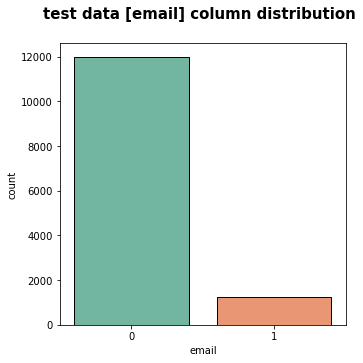

In [81]:
# countplot 시각화

fig, axes = plt.subplots(1, 1, figsize=(5, 5), sharey=True)

sns.countplot(x='email', data=test, palette="Set2", edgecolor='black')  
plt.suptitle('test data [email] column distribution', fontsize=15, fontweight='bold', x=0.13, y=1.0, ha='left') 

plt.tight_layout()
plt.show()

<AxesSubplot:ylabel='email'>

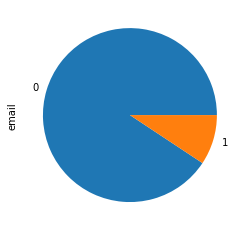

In [82]:
# 데이터 분포도
test['email'].value_counts().plot.pie()

### [occyp_type] EDA -  직업 유형
+ train과 test 데이터의 plot 분포가 비슷
+ train과 test 모두 Laborers의 비율이 가장 높음

#### train

In [83]:
train['occyp_type'].value_counts()

Laborers                 2260
Core staff               1337
Sales staff              1256
Managers                 1061
Drivers                   791
High skill tech staff     521
Accountants               445
Medicine staff            420
Security staff            226
Cooking staff             214
Cleaning staff            198
Private service staff     115
Low-skill Laborers         63
Waiters/barmen staff       53
Secretaries                48
HR staff                   35
Realty agents              33
IT staff                   20
Name: occyp_type, dtype: int64

<AxesSubplot:>

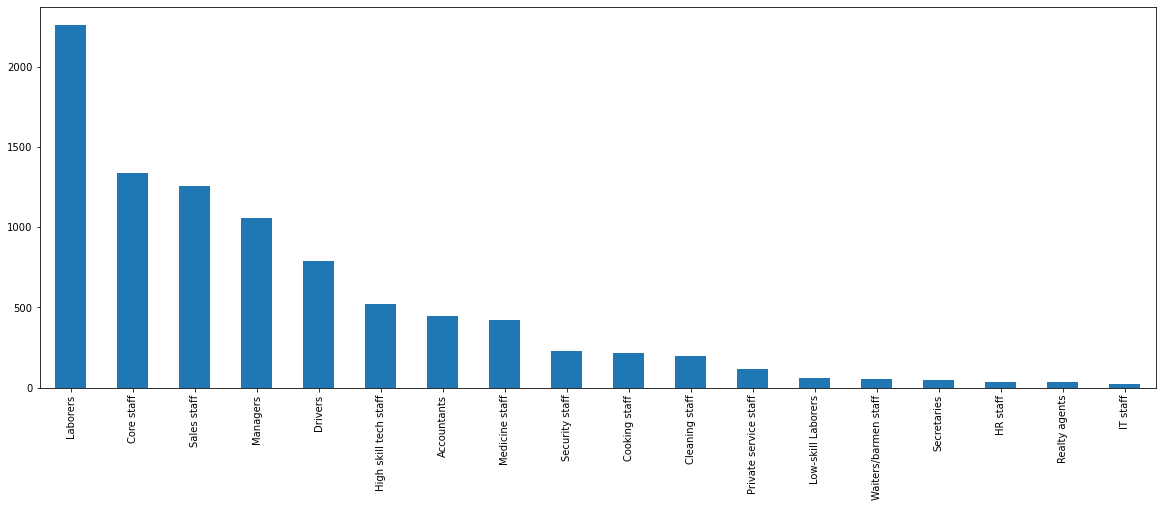

In [84]:
plt.figure(figsize=(20, 7))
train['occyp_type'].value_counts().plot.bar()

#### test

In [85]:
test['occyp_type'].value_counts()

Laborers                 2252
Core staff               1309
Sales staff              1283
Managers                 1106
Drivers                   784
High skill tech staff     519
Accountants               457
Medicine staff            444
Cooking staff             243
Cleaning staff            205
Security staff            198
Private service staff     128
Waiters/barmen staff       71
Low-skill Laborers         64
Secretaries                49
Realty agents              30
HR staff                   27
IT staff                   21
Name: occyp_type, dtype: int64

<AxesSubplot:>

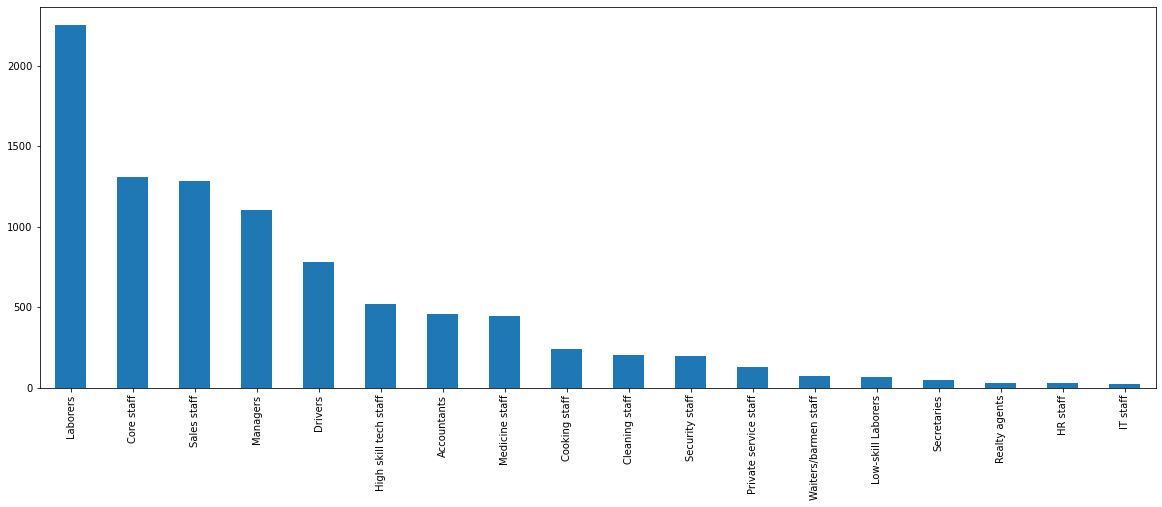

In [86]:
plt.figure(figsize=(20, 7))
test['occyp_type'].value_counts().plot.bar()

### [family_size] EDA - 가족 규모
+ train과 test 데이터의 countplot 분포가 비슷
+ train과 test 모두 2의 비율이 높음

#### train

In [87]:
train['family_size'].value_counts()

2     7016
1     2576
3     2374
4     1092
5      138
6       24
7        5
15       2
9        1
Name: family_size, dtype: int64

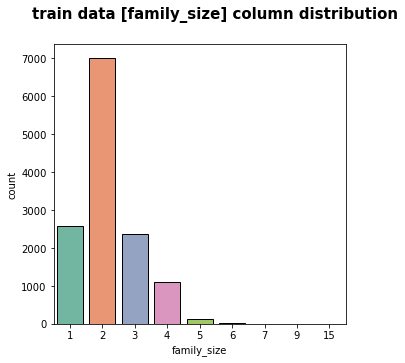

In [88]:
# countplot 시각화

fig, axes = plt.subplots(1, 1, figsize=(5, 5), sharey=True)

sns.countplot(x='family_size', data=train, palette="Set2", edgecolor='black')  
plt.suptitle('train data [family_size] column distribution', fontsize=15, fontweight='bold', x=0.1, y=1.0, ha='left') 

plt.tight_layout()
plt.show()

#### test

In [89]:
test['family_size'].value_counts()

2     7090
1     2533
3     2258
4     1168
5      153
6       20
7        4
9        1
20       1
15       1
Name: family_size, dtype: int64

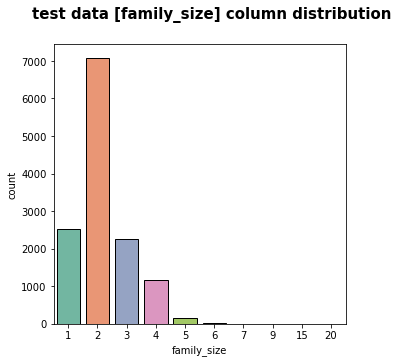

In [90]:
# countplot 시각화

fig, axes = plt.subplots(1, 1, figsize=(5, 5), sharey=True)

sns.countplot(x='family_size', data=test, palette="Set2", edgecolor='black')  
plt.suptitle('test data [family_size] column distribution', fontsize=15, fontweight='bold', x=0.1, y=1.0, ha='left') 

plt.tight_layout()
plt.show()

### [begin_month] EDA - 신용카드 발급 월, 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 한 달 전에 신용카드를 발급함을 의미
+ train과 test 데이터의 boxplot 분포가 비슷
+ 모두 outlier로 판단되는 데이터 없음

#### train

In [91]:
train['begin_month']

0       -53
1       -26
2        -9
3       -12
4        -3
         ..
13223   -43
13224   -53
13225   -34
13226   -16
13227    -4
Name: begin_month, Length: 13228, dtype: int64

<AxesSubplot:>

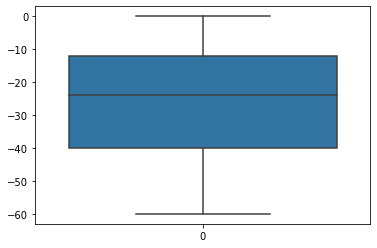

In [92]:
# boxplot 시각화
sns.boxplot(train['begin_month'])

#### test

In [93]:
test['begin_month']

0       -10
1       -52
2       -15
3       -24
4       -54
         ..
13224   -30
13225   -24
13226   -26
13227   -30
13228   -53
Name: begin_month, Length: 13229, dtype: int64

<AxesSubplot:>

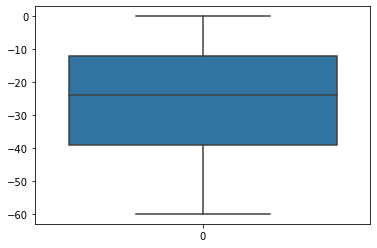

In [94]:
# boxplot 시각화
sns.boxplot(test['begin_month'])

### 전체적인 heatmap

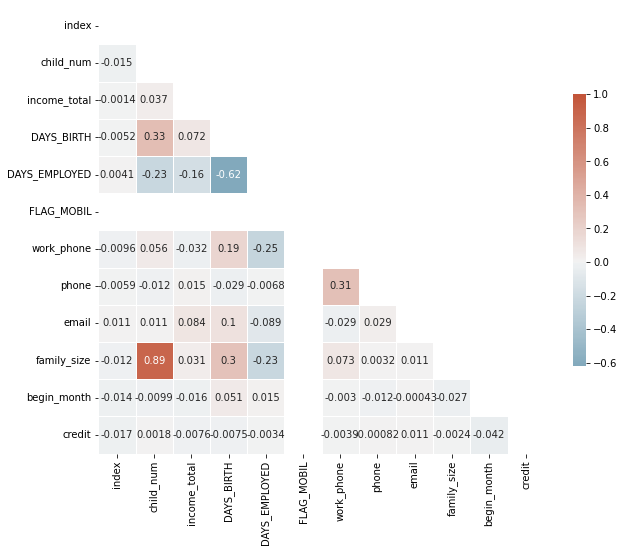

In [95]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(train.corr()))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(train.corr(), mask=mask, cmap=cmap, vmax=1.0, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.yticks(rotation=0)
plt.show()

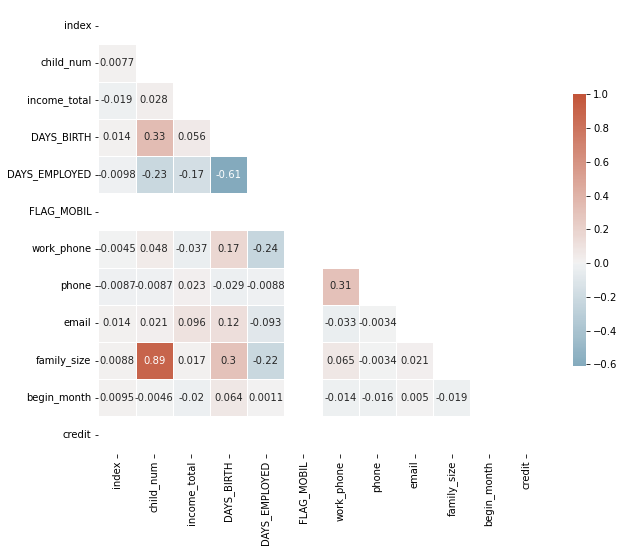

In [96]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(test.corr()))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(test.corr(), mask=mask, cmap=cmap, vmax=1.0, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.yticks(rotation=0)
plt.show()

### 전체적인 pairplot

<Figure size 576x576 with 0 Axes>

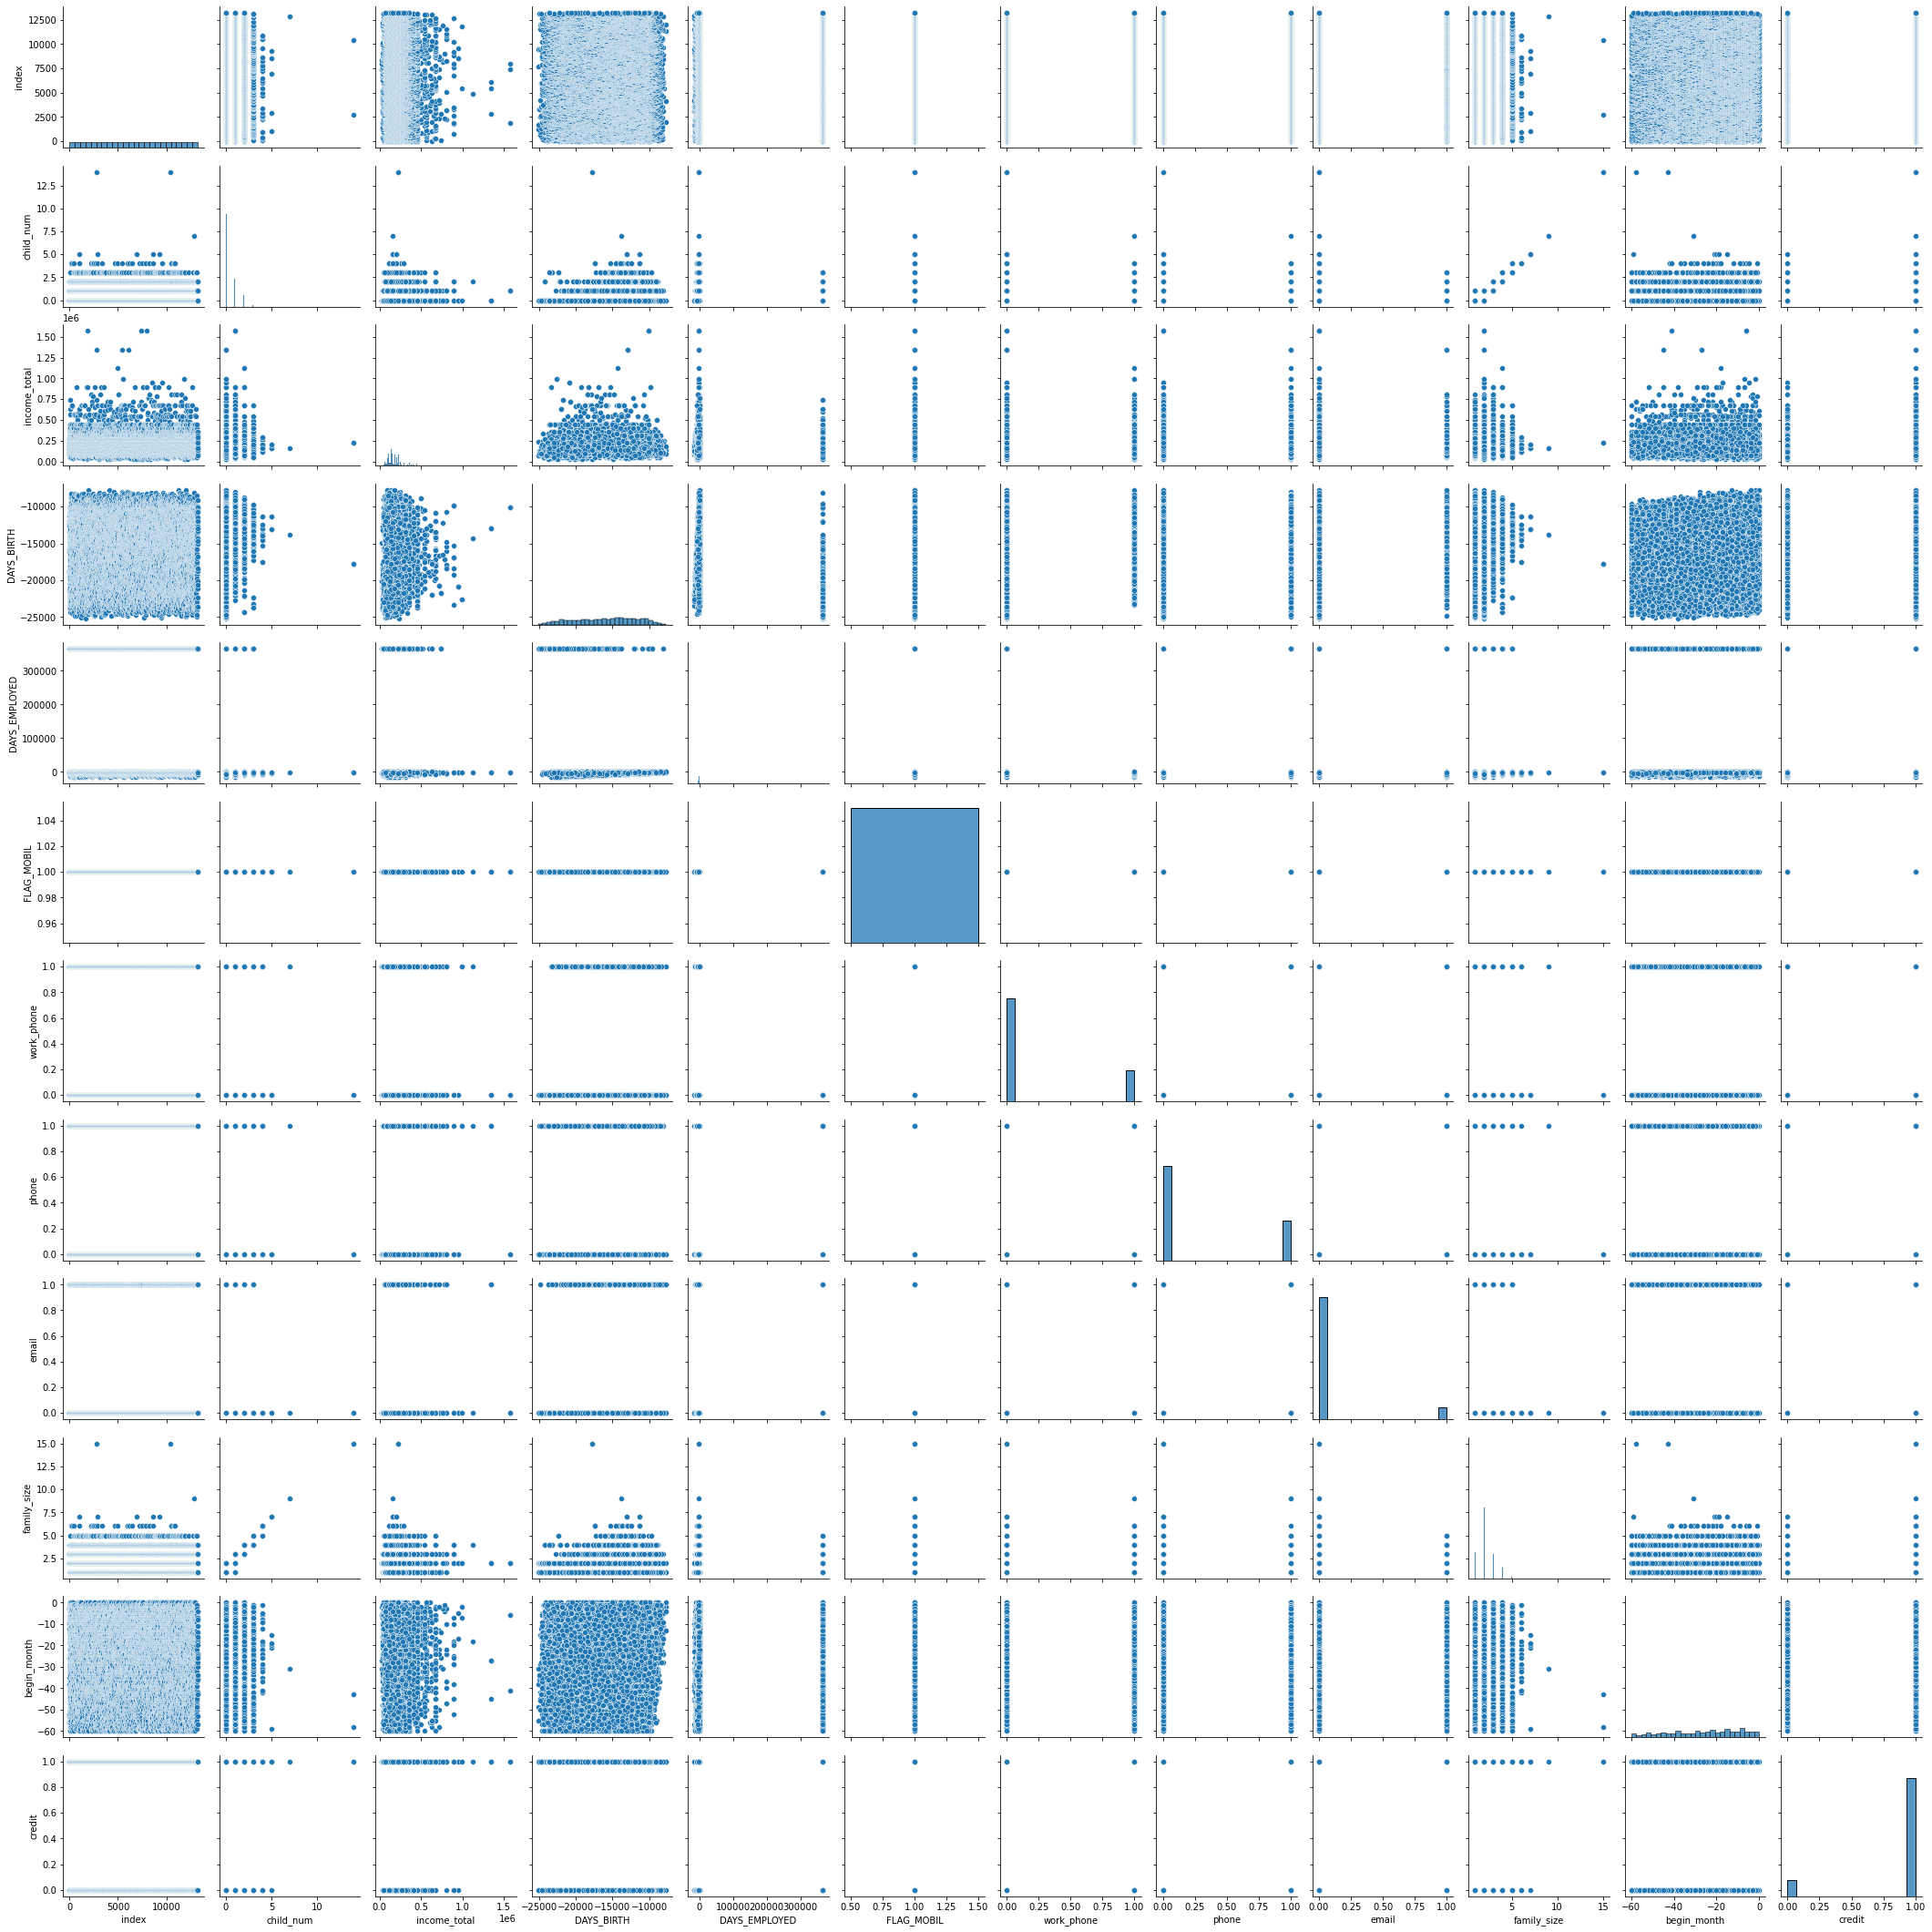

In [97]:
plt.figure(figsize=(8,8))
sns.pairplot(data=train)
plt.show()

<Figure size 576x576 with 0 Axes>

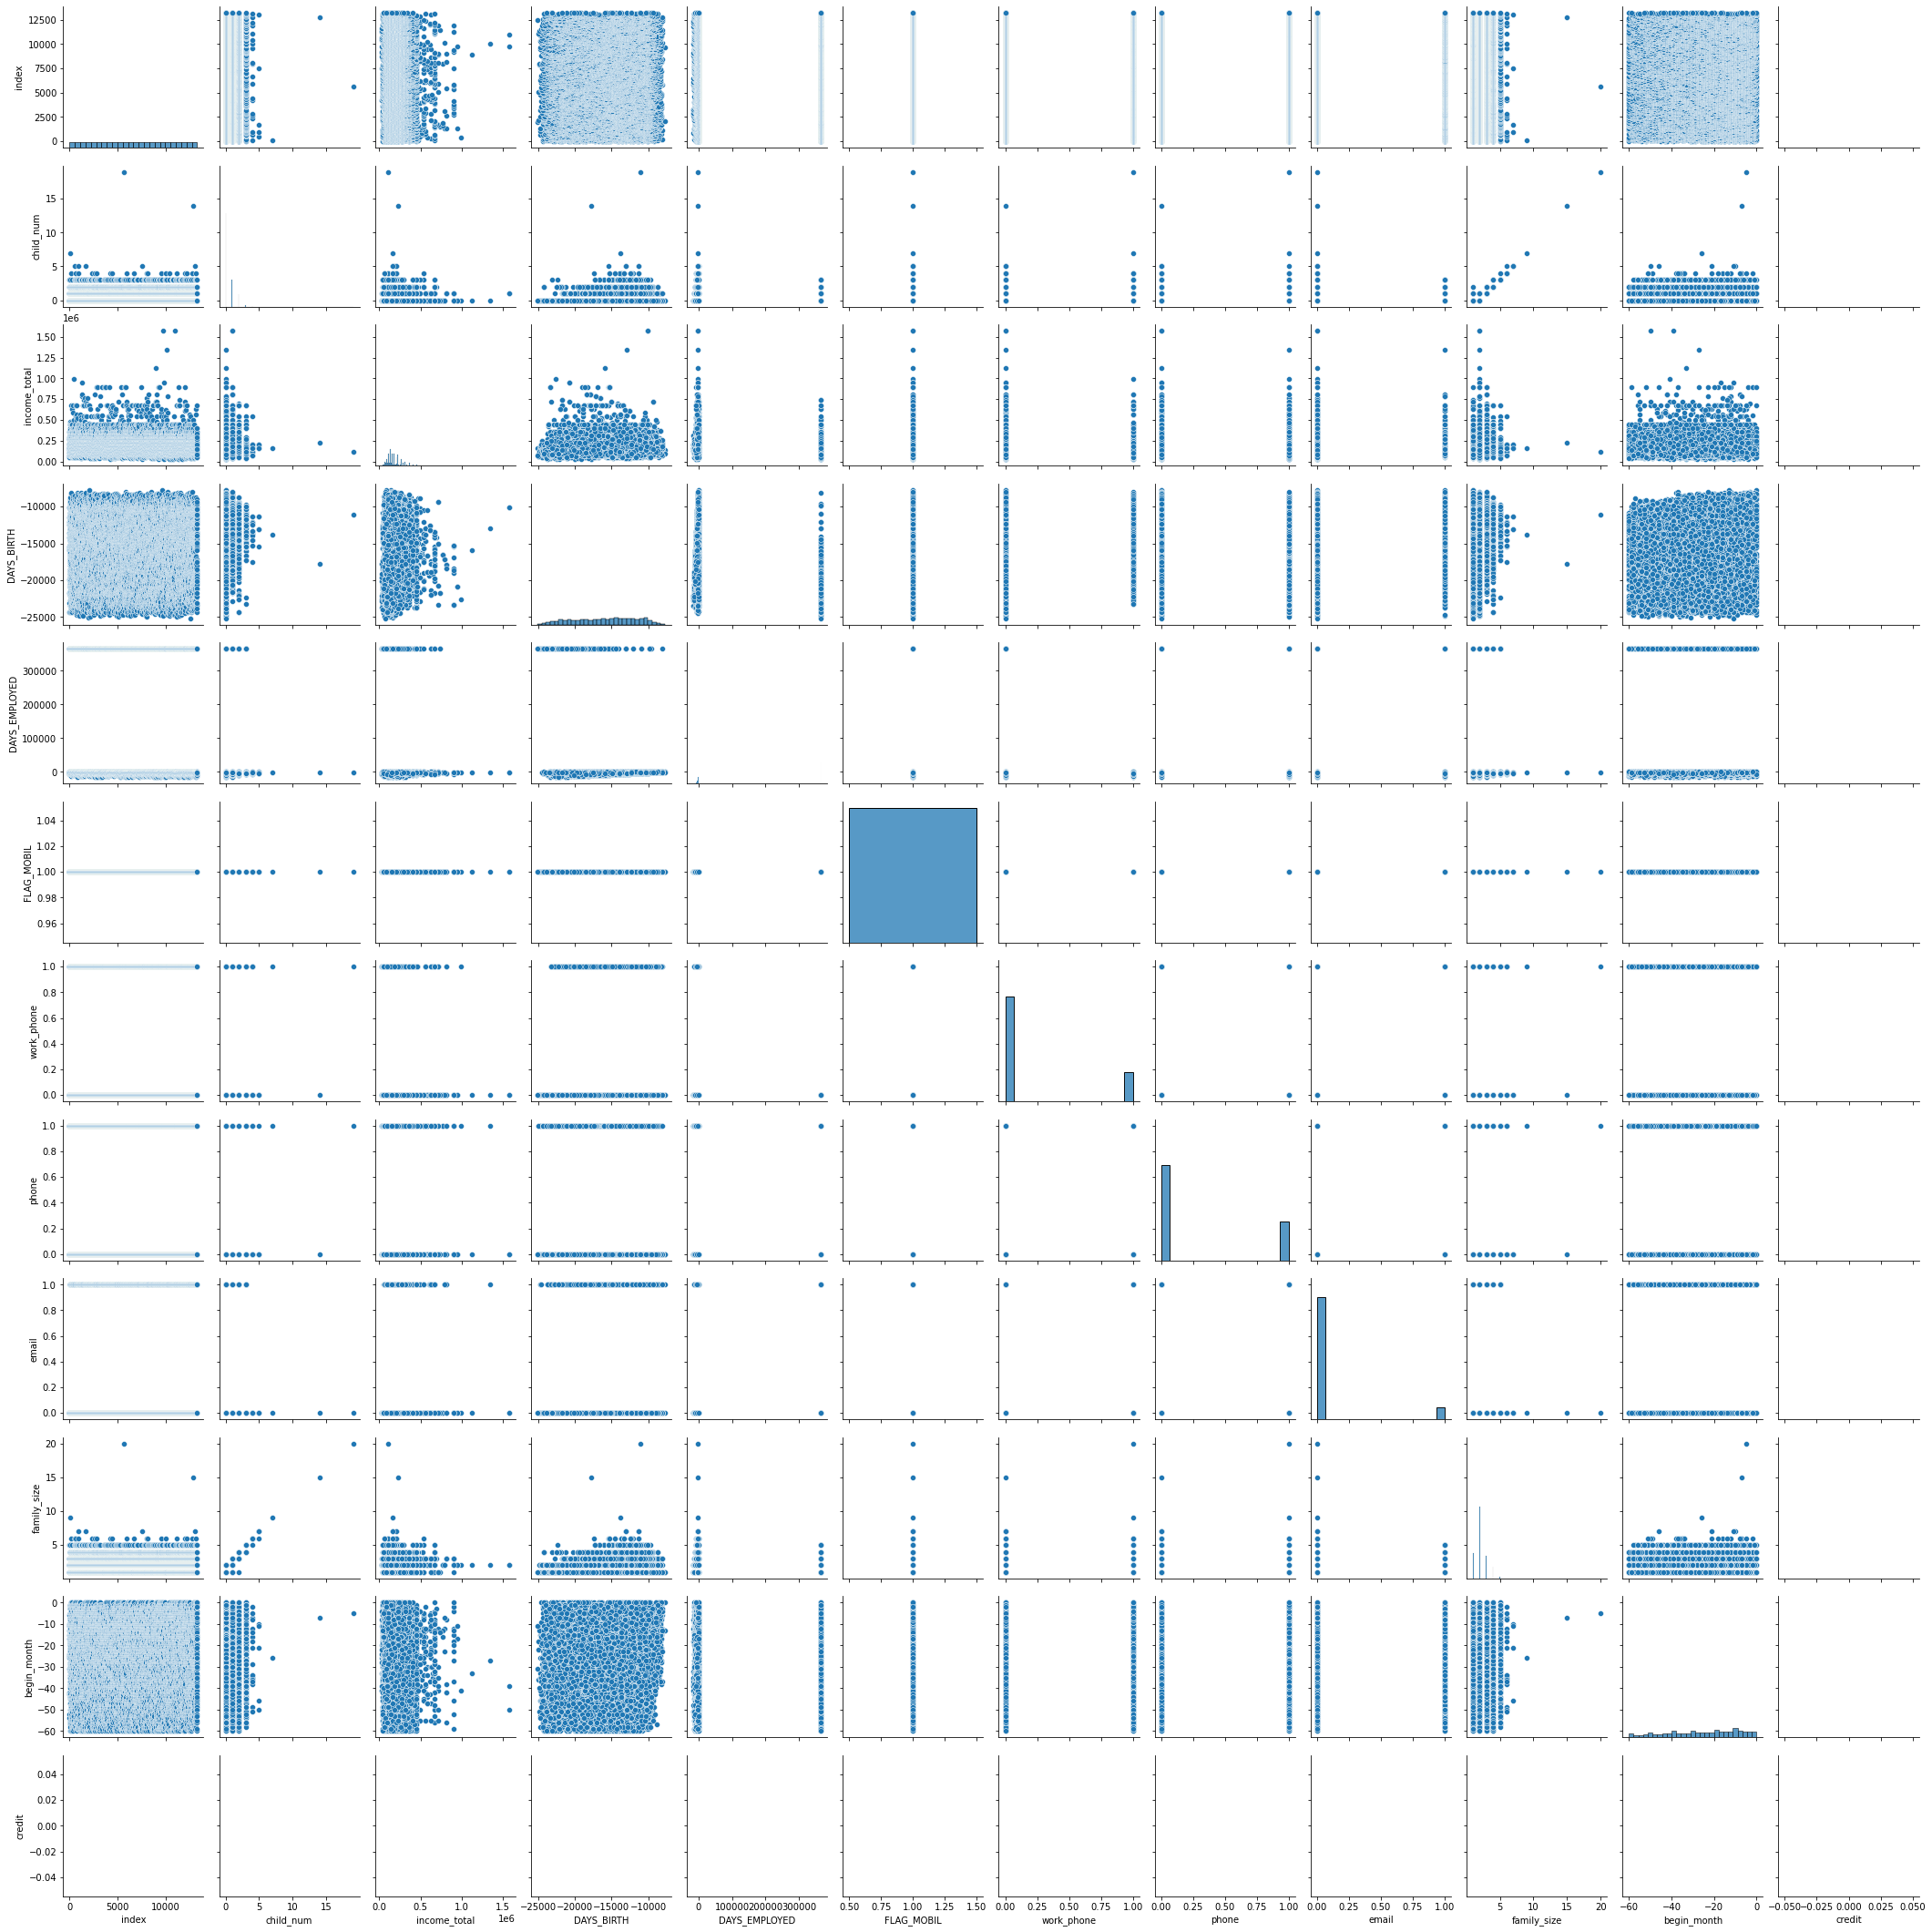

In [98]:
plt.figure(figsize=(8,8))
sns.pairplot(data=test)
plt.show()